In [1]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ol_df = pd.read_csv('OLPFF.csv') #Reading in Positional data
metric = 'Net EPA' #Using average block percentage to predict

In [3]:
print(ol_df.columns)

Index(['Unnamed: 0.1', 'Year', 'Team', 'Position',
       'weighted_avg_snap_counts_offense', 'weighted_avg_block_percent',
       'weighted_avg_declined_penalties', 'weighted_avg_franchise_id',
       'weighted_avg_grades_offense', 'weighted_avg_grades_pass_block',
       'weighted_avg_grades_run_block', 'weighted_avg_hits_allowed',
       'weighted_avg_hurries_allowed', 'weighted_avg_non_spike_pass_block',
       'weighted_avg_non_spike_pass_block_percentage',
       'weighted_avg_pass_block_percent', 'weighted_avg_pbe',
       'weighted_avg_penalties', 'weighted_avg_pressures_allowed',
       'weighted_avg_sacks_allowed', 'weighted_avg_snap_counts_block',
       'weighted_avg_snap_counts_ce', 'weighted_avg_snap_counts_lg',
       'weighted_avg_snap_counts_lt', 'weighted_avg_snap_counts_pass_block',
       'weighted_avg_snap_counts_pass_play', 'weighted_avg_snap_counts_rg',
       'weighted_avg_snap_counts_rt', 'weighted_avg_snap_counts_run_block',
       'weighted_avg_snap_counts_te

In [4]:
drop_col = ['Unnamed: 0', 'Unnamed: 0.1']
ol_df = ol_df.drop(columns=drop_col)

In [5]:
ol_df.head(20)

,Year,Team,Position,weighted_avg_snap_counts_offense,weighted_avg_block_percent,weighted_avg_declined_penalties,weighted_avg_franchise_id,weighted_avg_grades_offense,weighted_avg_grades_pass_block,weighted_avg_grades_run_block,...,Previous_snap_counts_te,Value_cap_space,Value_draft_data,Previous_AV,Current_AV,Previous_PFF,Current_PFF,Total DVOA,win-loss-pct,Net EPA
0,2019,49ers,OL,662.458691,96.139135,0.170900,28.0,63.017456,68.190475,59.976900,...,41.810652,14.224230,434.877698,36.0,46.0,70.501058,65.120377,27.90%,0.8125,0.216
1,2019,Bears,OL,759.998305,97.383057,1.159690,6.0,63.065766,63.979803,59.991360,...,9.020225,7.279490,231.529311,43.0,31.0,69.843681,61.965669,-2.10%,0.5000,-0.032
2,2019,Bengals,OL,759.564553,97.642233,0.147813,7.0,57.485792,61.343623,54.929307,...,15.566120,15.499469,309.079455,43.0,33.0,59.900018,55.264855,-25.20%,0.1250,-0.193
3,2019,Bills,OL,560.380878,94.114528,1.311794,4.0,60.221756,62.464287,59.228500,...,25.979112,15.435707,274.425221,26.0,37.0,60.528950,62.691512,2.70%,0.6250,0.061
4,2019,Broncos,OL,699.393958,93.332885,0.697608,10.0,66.687159,72.724448,61.507985,...,12.760149,13.740701,395.666035,30.0,32.0,66.597719,66.602448,-9.00%,0.4375,-0.053
5,2019,Browns,OL,754.923078,95.856853,0.985223,8.0,63.837980,74.047740,58.845927,...,30.394233,18.246546,412.166910,41.0,42.0,71.563016,62.586725,-10.10%,0.3750,-0.076
6,2019,Buccaneers,OL,793.214473,94.462770,0.237257,30.0,68.787049,67.832982,64.593261,...,12.131440,22.088204,150.602944,45.0,45.0,61.804343,69.990388,1.50%,0.4375,0.072
7,2019,Cardinals,OL,860.499493,96.306883,0.032026,1.0,60.524035,71.363944,53.381251,...,12.374974,14.383634,189.512855,26.0,43.0,58.404447,62.112593,-5.80%,0.3125,-0.081
8,2019,Chargers,OL,544.049401,92.238363,0.485103,27.0,58.915261,62.472415,56.338726,...,56.119839,12.959617,293.327813,48.0,44.0,60.269466,57.432533,-6.70%,0.3125,0.000
9,2019,Chiefs,OL,724.052026,92.762864,1.403070,16.0,61.274848,69.311511,54.286739,...,15.767183,14.946865,441.561038,66.0,54.0,68.379473,64.248001,30.20%,0.7500,0.133


In [6]:
team_data = ol_df.groupby('Team')
ol_df.head(32)#check all the teams are have their ol values grouped

,Year,Team,Position,weighted_avg_snap_counts_offense,weighted_avg_block_percent,weighted_avg_declined_penalties,weighted_avg_franchise_id,weighted_avg_grades_offense,weighted_avg_grades_pass_block,weighted_avg_grades_run_block,...,Previous_snap_counts_te,Value_cap_space,Value_draft_data,Previous_AV,Current_AV,Previous_PFF,Current_PFF,Total DVOA,win-loss-pct,Net EPA
0,2019,49ers,OL,662.458691,96.139135,0.170900,28.0,63.017456,68.190475,59.976900,...,41.810652,14.224230,434.877698,36.0,46.0,70.501058,65.120377,27.90%,0.8125,0.216
1,2019,Bears,OL,759.998305,97.383057,1.159690,6.0,63.065766,63.979803,59.991360,...,9.020225,7.279490,231.529311,43.0,31.0,69.843681,61.965669,-2.10%,0.5000,-0.032
2,2019,Bengals,OL,759.564553,97.642233,0.147813,7.0,57.485792,61.343623,54.929307,...,15.566120,15.499469,309.079455,43.0,33.0,59.900018,55.264855,-25.20%,0.1250,-0.193
3,2019,Bills,OL,560.380878,94.114528,1.311794,4.0,60.221756,62.464287,59.228500,...,25.979112,15.435707,274.425221,26.0,37.0,60.528950,62.691512,2.70%,0.6250,0.061
4,2019,Broncos,OL,699.393958,93.332885,0.697608,10.0,66.687159,72.724448,61.507985,...,12.760149,13.740701,395.666035,30.0,32.0,66.597719,66.602448,-9.00%,0.4375,-0.053
5,2019,Browns,OL,754.923078,95.856853,0.985223,8.0,63.837980,74.047740,58.845927,...,30.394233,18.246546,412.166910,41.0,42.0,71.563016,62.586725,-10.10%,0.3750,-0.076
6,2019,Buccaneers,OL,793.214473,94.462770,0.237257,30.0,68.787049,67.832982,64.593261,...,12.131440,22.088204,150.602944,45.0,45.0,61.804343,69.990388,1.50%,0.4375,0.072
7,2019,Cardinals,OL,860.499493,96.306883,0.032026,1.0,60.524035,71.363944,53.381251,...,12.374974,14.383634,189.512855,26.0,43.0,58.404447,62.112593,-5.80%,0.3125,-0.081
8,2019,Chargers,OL,544.049401,92.238363,0.485103,27.0,58.915261,62.472415,56.338726,...,56.119839,12.959617,293.327813,48.0,44.0,60.269466,57.432533,-6.70%,0.3125,0.000
9,2019,Chiefs,OL,724.052026,92.762864,1.403070,16.0,61.274848,69.311511,54.286739,...,15.767183,14.946865,441.561038,66.0,54.0,68.379473,64.248001,30.20%,0.7500,0.133


In [19]:
sequences = []
targets = []

#Iterating over team and their data
for team, group in team_data:
    if len(group) >= 4:
        print(f"Processing team: {team}, data length(years): {len(group)}")
        
        #Iterate through data to make sequences for every 3 years
        for i in range(len(group) - 3):
            sequence = group.iloc[i:i+3][['weighted_avg_block_percent', 'weighted_avg_grades_offense', 'weighted_avg_grades_pass_block', 'weighted_avg_grades_run_block','weighted_avg_hits_allowed', 'weighted_avg_hurries_allowed', 'weighted_avg_penalties']]
            #target the proceeding year's Current PFF to compare
            target = group.iloc[i+3]['Net EPA']
            sequences.append(sequence.values) #Add sequence values to sequence list
            targets.append(target) #Add target values to target list
            
#Convert lists to numpy arrays
s = np.array(sequences)
t = np.array(targets)

print(f"Total sequences generated: {len(sequences)}")
print(f"X shape: {s.shape}, y shape: {t.shape}")

Processing team: 49ers, data length(years): 4
Processing team: Bears, data length(years): 4
Processing team: Bengals, data length(years): 4
Processing team: Bills, data length(years): 4
Processing team: Broncos, data length(years): 4
Processing team: Browns, data length(years): 4
Processing team: Buccaneers, data length(years): 4
Processing team: Cardinals, data length(years): 4
Processing team: Chargers, data length(years): 4
Processing team: Chiefs, data length(years): 4
Processing team: Colts, data length(years): 4
Processing team: Commanders, data length(years): 4
Processing team: Cowboys, data length(years): 4
Processing team: Dolphins, data length(years): 4
Processing team: Eagles, data length(years): 4
Processing team: Falcons, data length(years): 4
Processing team: Giants, data length(years): 4
Processing team: Jaguars, data length(years): 4
Processing team: Jets, data length(years): 4
Processing team: Lions, data length(years): 4
Processing team: Packers, data length(years): 4

In [20]:
# Reshape X to (samples, timesteps, features)
S = s.reshape(s.shape[0], 3, -1)  # 3 years per sequence, features will be inferred

print(S.shape)  # Should now be (samples, 3, features)
print(S)

(32, 3, 7)
[[[96.1391349  63.01745565 68.19047485 59.97689971  1.73671953
   11.24121098  2.98488777]
  [96.35795788 67.57025724 56.80740233 70.38029056  4.65267049
    9.72233198  3.13955954]
  [96.85075674 67.23787951 58.93529536 63.91171074  2.05552537
    7.96158426  2.26397829]]

 [[97.38305737 63.06576553 63.97980296 59.99136005  3.14395581
   12.94766554  3.40479083]
  [94.86396985 61.8420493  52.57599562 66.66205037  1.88969943
   10.44597687  1.42552431]
  [95.44028553 59.7551331  61.79156266 59.06451834  3.11775851
   21.39916887  5.15012757]]

 [[97.64223283 57.48579208 61.34362328 54.92930724  2.45400698
   15.30106428  2.39254963]
  [92.99585157 56.30215046 54.9578474  61.70551618  3.00313621
    8.47000214  2.64857266]
  [90.04121762 58.81014055 60.6772086  60.95796619  1.93608322
    7.23822216  2.31491481]]

 [[94.11452794 60.22175568 62.4642866  59.22850049  1.80950227
   10.35341643  4.67160346]
  [95.77746955 67.09935829 66.5174057  67.48547052  1.38282782
   13.2711

In [31]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, SimpleRNN, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define the input layer
inputs = Input(shape=(3, 7))  # 3 time steps, 6 features because I had less features than 8

# Add a Dense layer before the attention to create more variability in the input
dense_input = Dense(16, activation='relu')(inputs)

# Add MultiHeadAttention layer
attention_output = MultiHeadAttention(num_heads=2, key_dim=8)(dense_input, dense_input)

# Add Layer Normalization for stability
attention_output = LayerNormalization()(attention_output)

# Add RNN layer to capture temporal dependencies
rnn_output = SimpleRNN(units=50, activation='relu')(attention_output)

# Add Dropout to prevent overfitting
rnn_output = Dropout(0.2)(rnn_output)

# Output layer for predicting Current PFF
output = Dense(1)(rnn_output)

# Define the model
model = Model(inputs=inputs, outputs=output)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping callback to monitor validation loss
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.6175e-04  
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - loss: 6.5072e-04
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 4.2300e-04
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 729us/step - loss: 3.0071e-04
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 2.7134e-04
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - loss: 4.2999e-04
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - loss: 8.0508e-04
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 915us/step - loss: 6.2648e-04
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 6.1610e-04
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 884us/step - loss: 5.3306e-04
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/step - loss: 8.1272e-04
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 816us/step - loss: 7.3552e-04
Epoch 13/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - loss: 0.0013
Epoch 14/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - loss: 6.3509e-04
Epoch 15/100
4/4 ━━

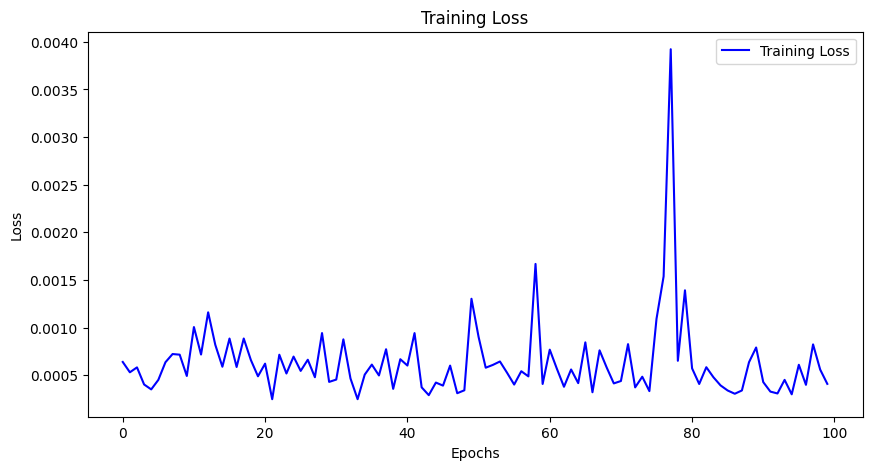

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
R² Score: 0.9891


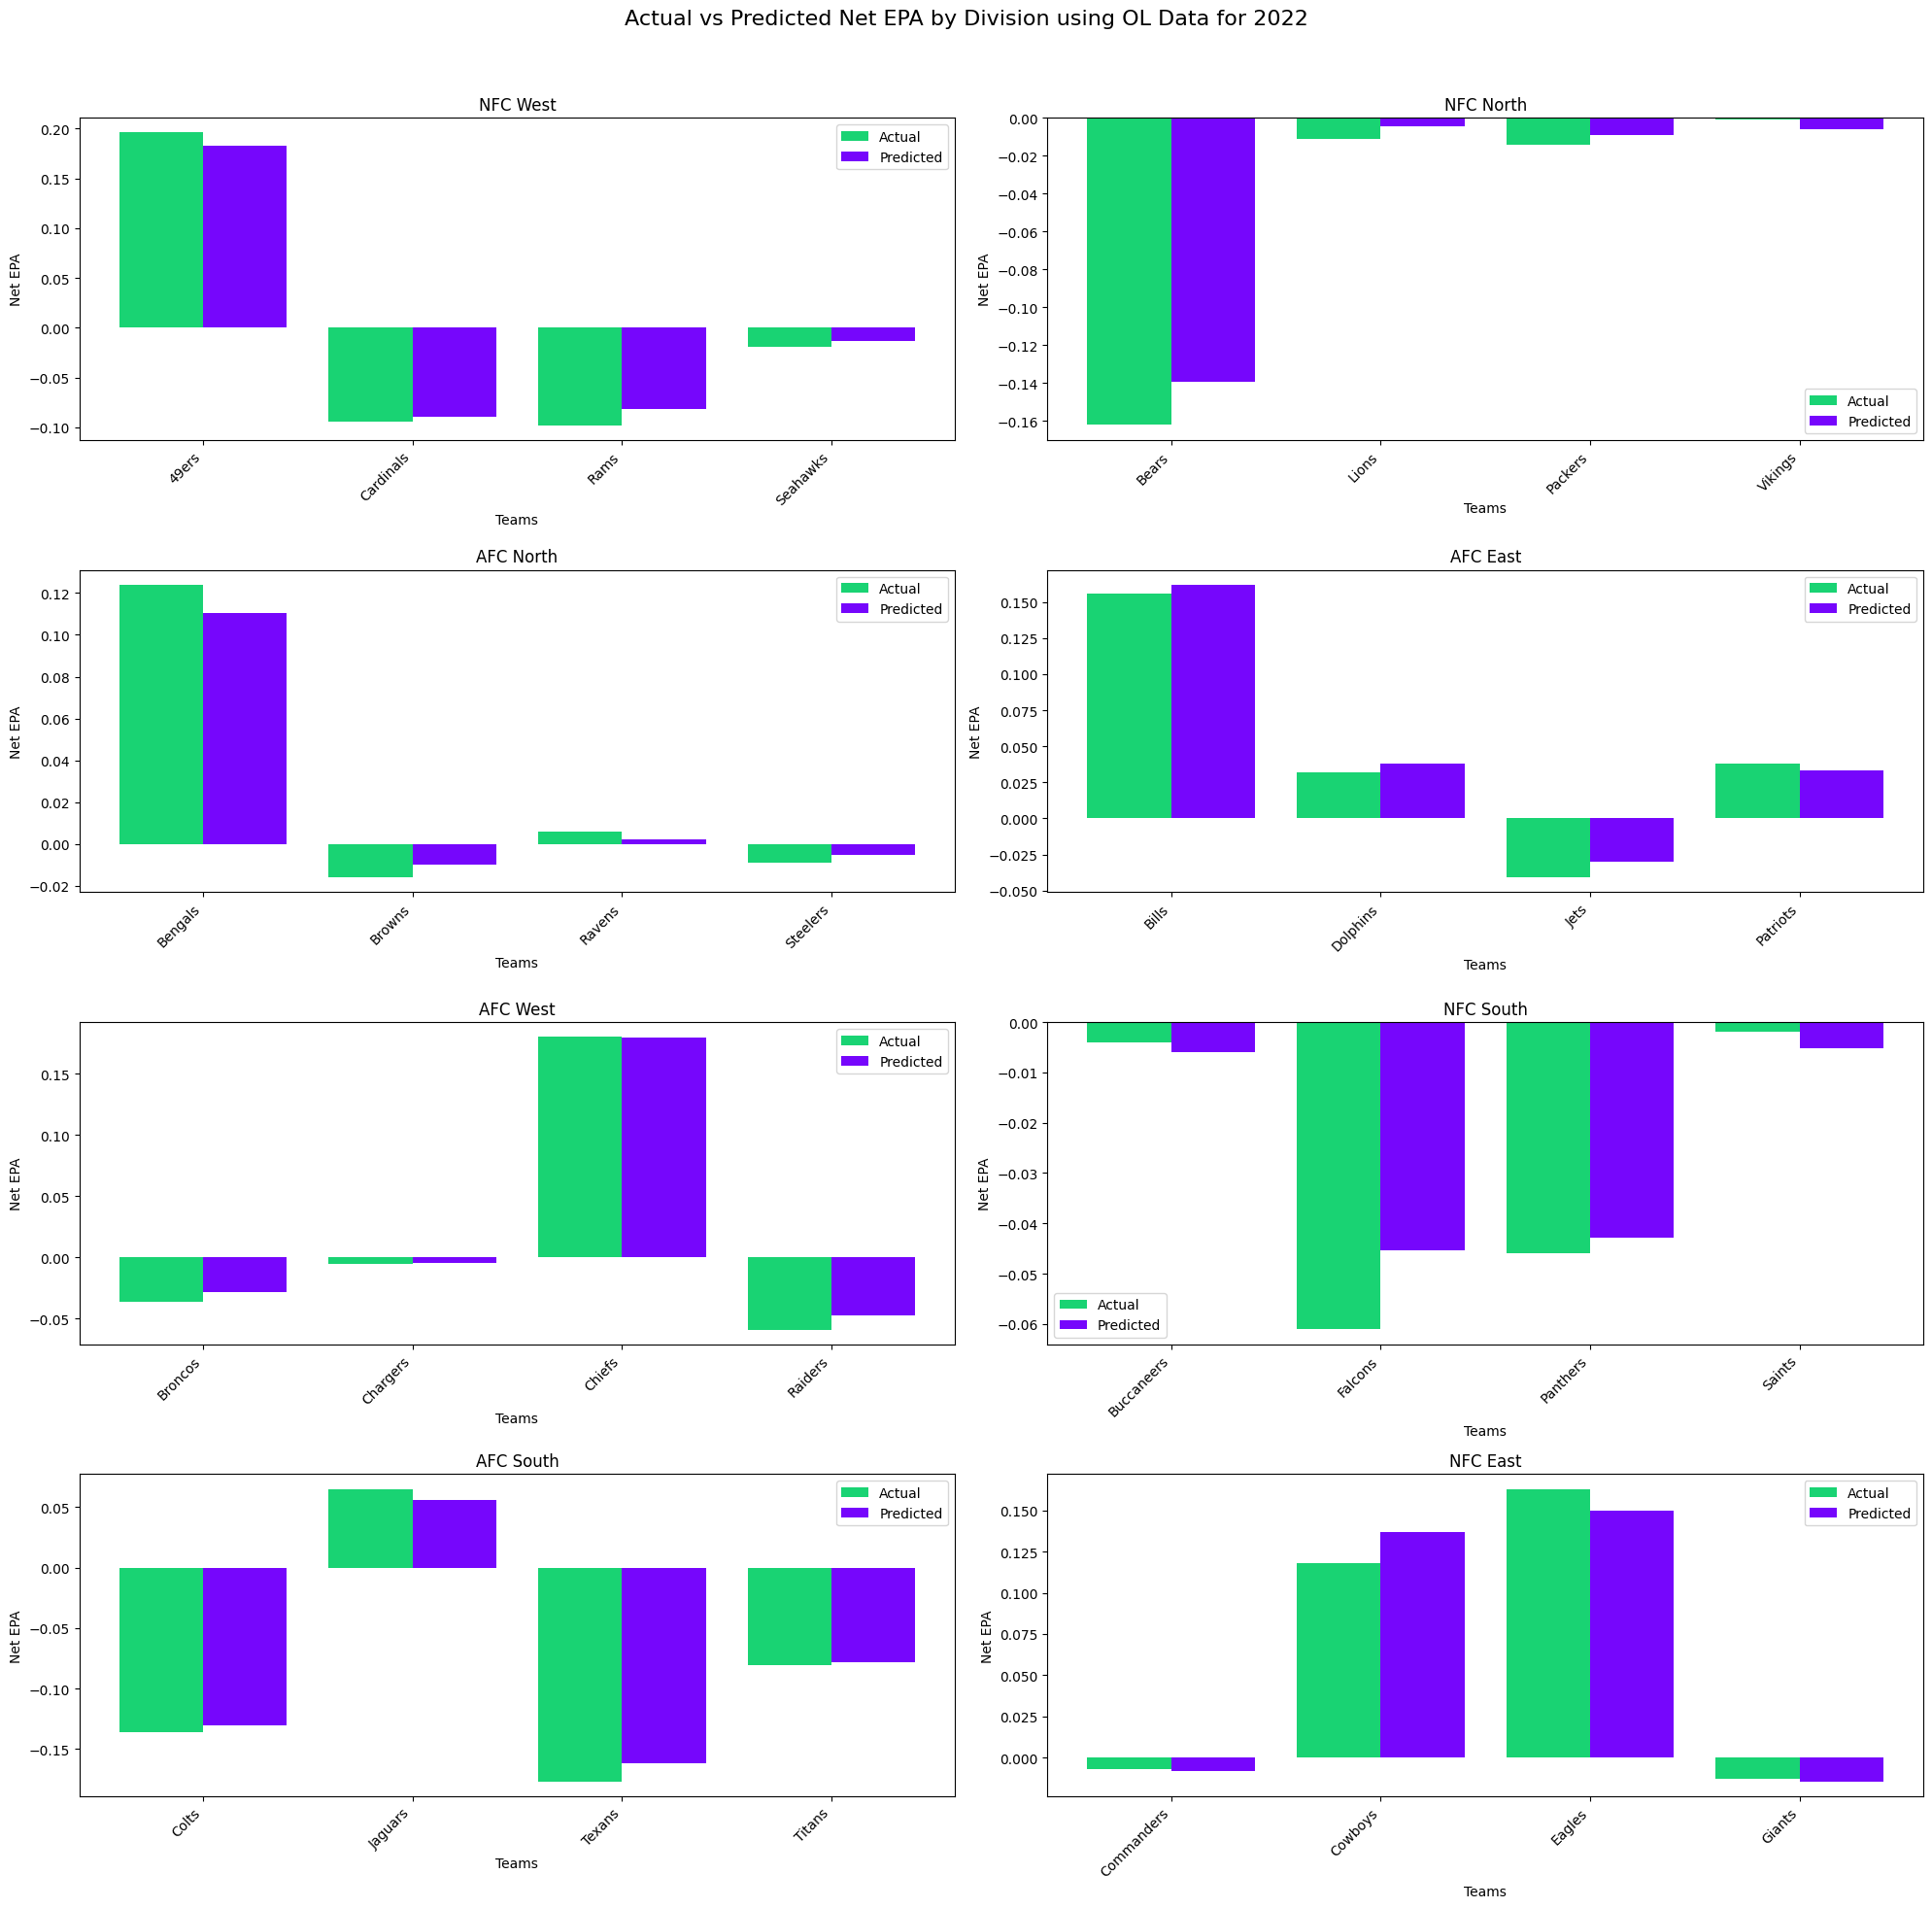

Epoch 1/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 942us/step - loss: 2.8433e-04
Epoch 2/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 5.8101e-04
Epoch 3/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 3.5182e-04
Epoch 4/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - loss: 5.1735e-04
Epoch 5/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 6.2478e-04
Epoch 6/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 969us/step - loss: 5.8834e-04
Epoch 7/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - loss: 3.2768e-04
Epoch 8/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 978us/step - loss: 2.2272e-04
Epoch 9/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step - loss: 5.6324e-04
Epoch 10/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 2.6208e-04
Epoch 11/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - loss: 5.4669e-04
Epoch 12/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 2.2987e-04
Epoch 13/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.8677e-04
Epoch 14/150
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - loss: 5.7605e-04
Epoch 15/150
4/4 ━━

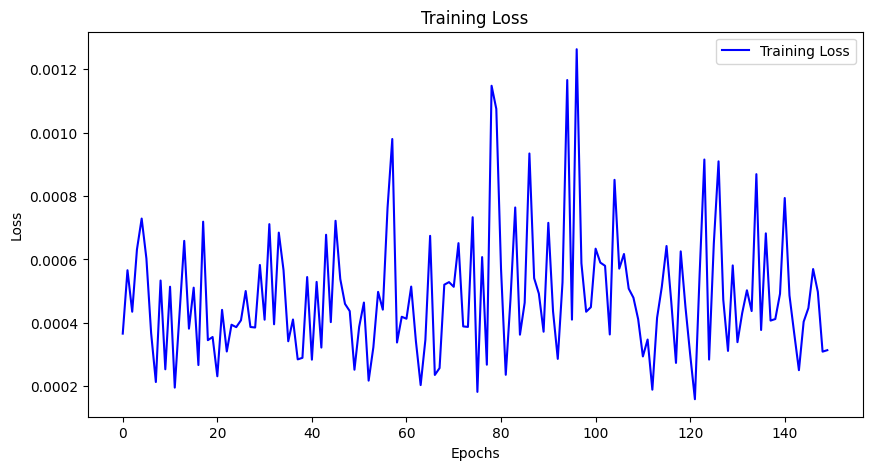

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
R² Score: 0.9842


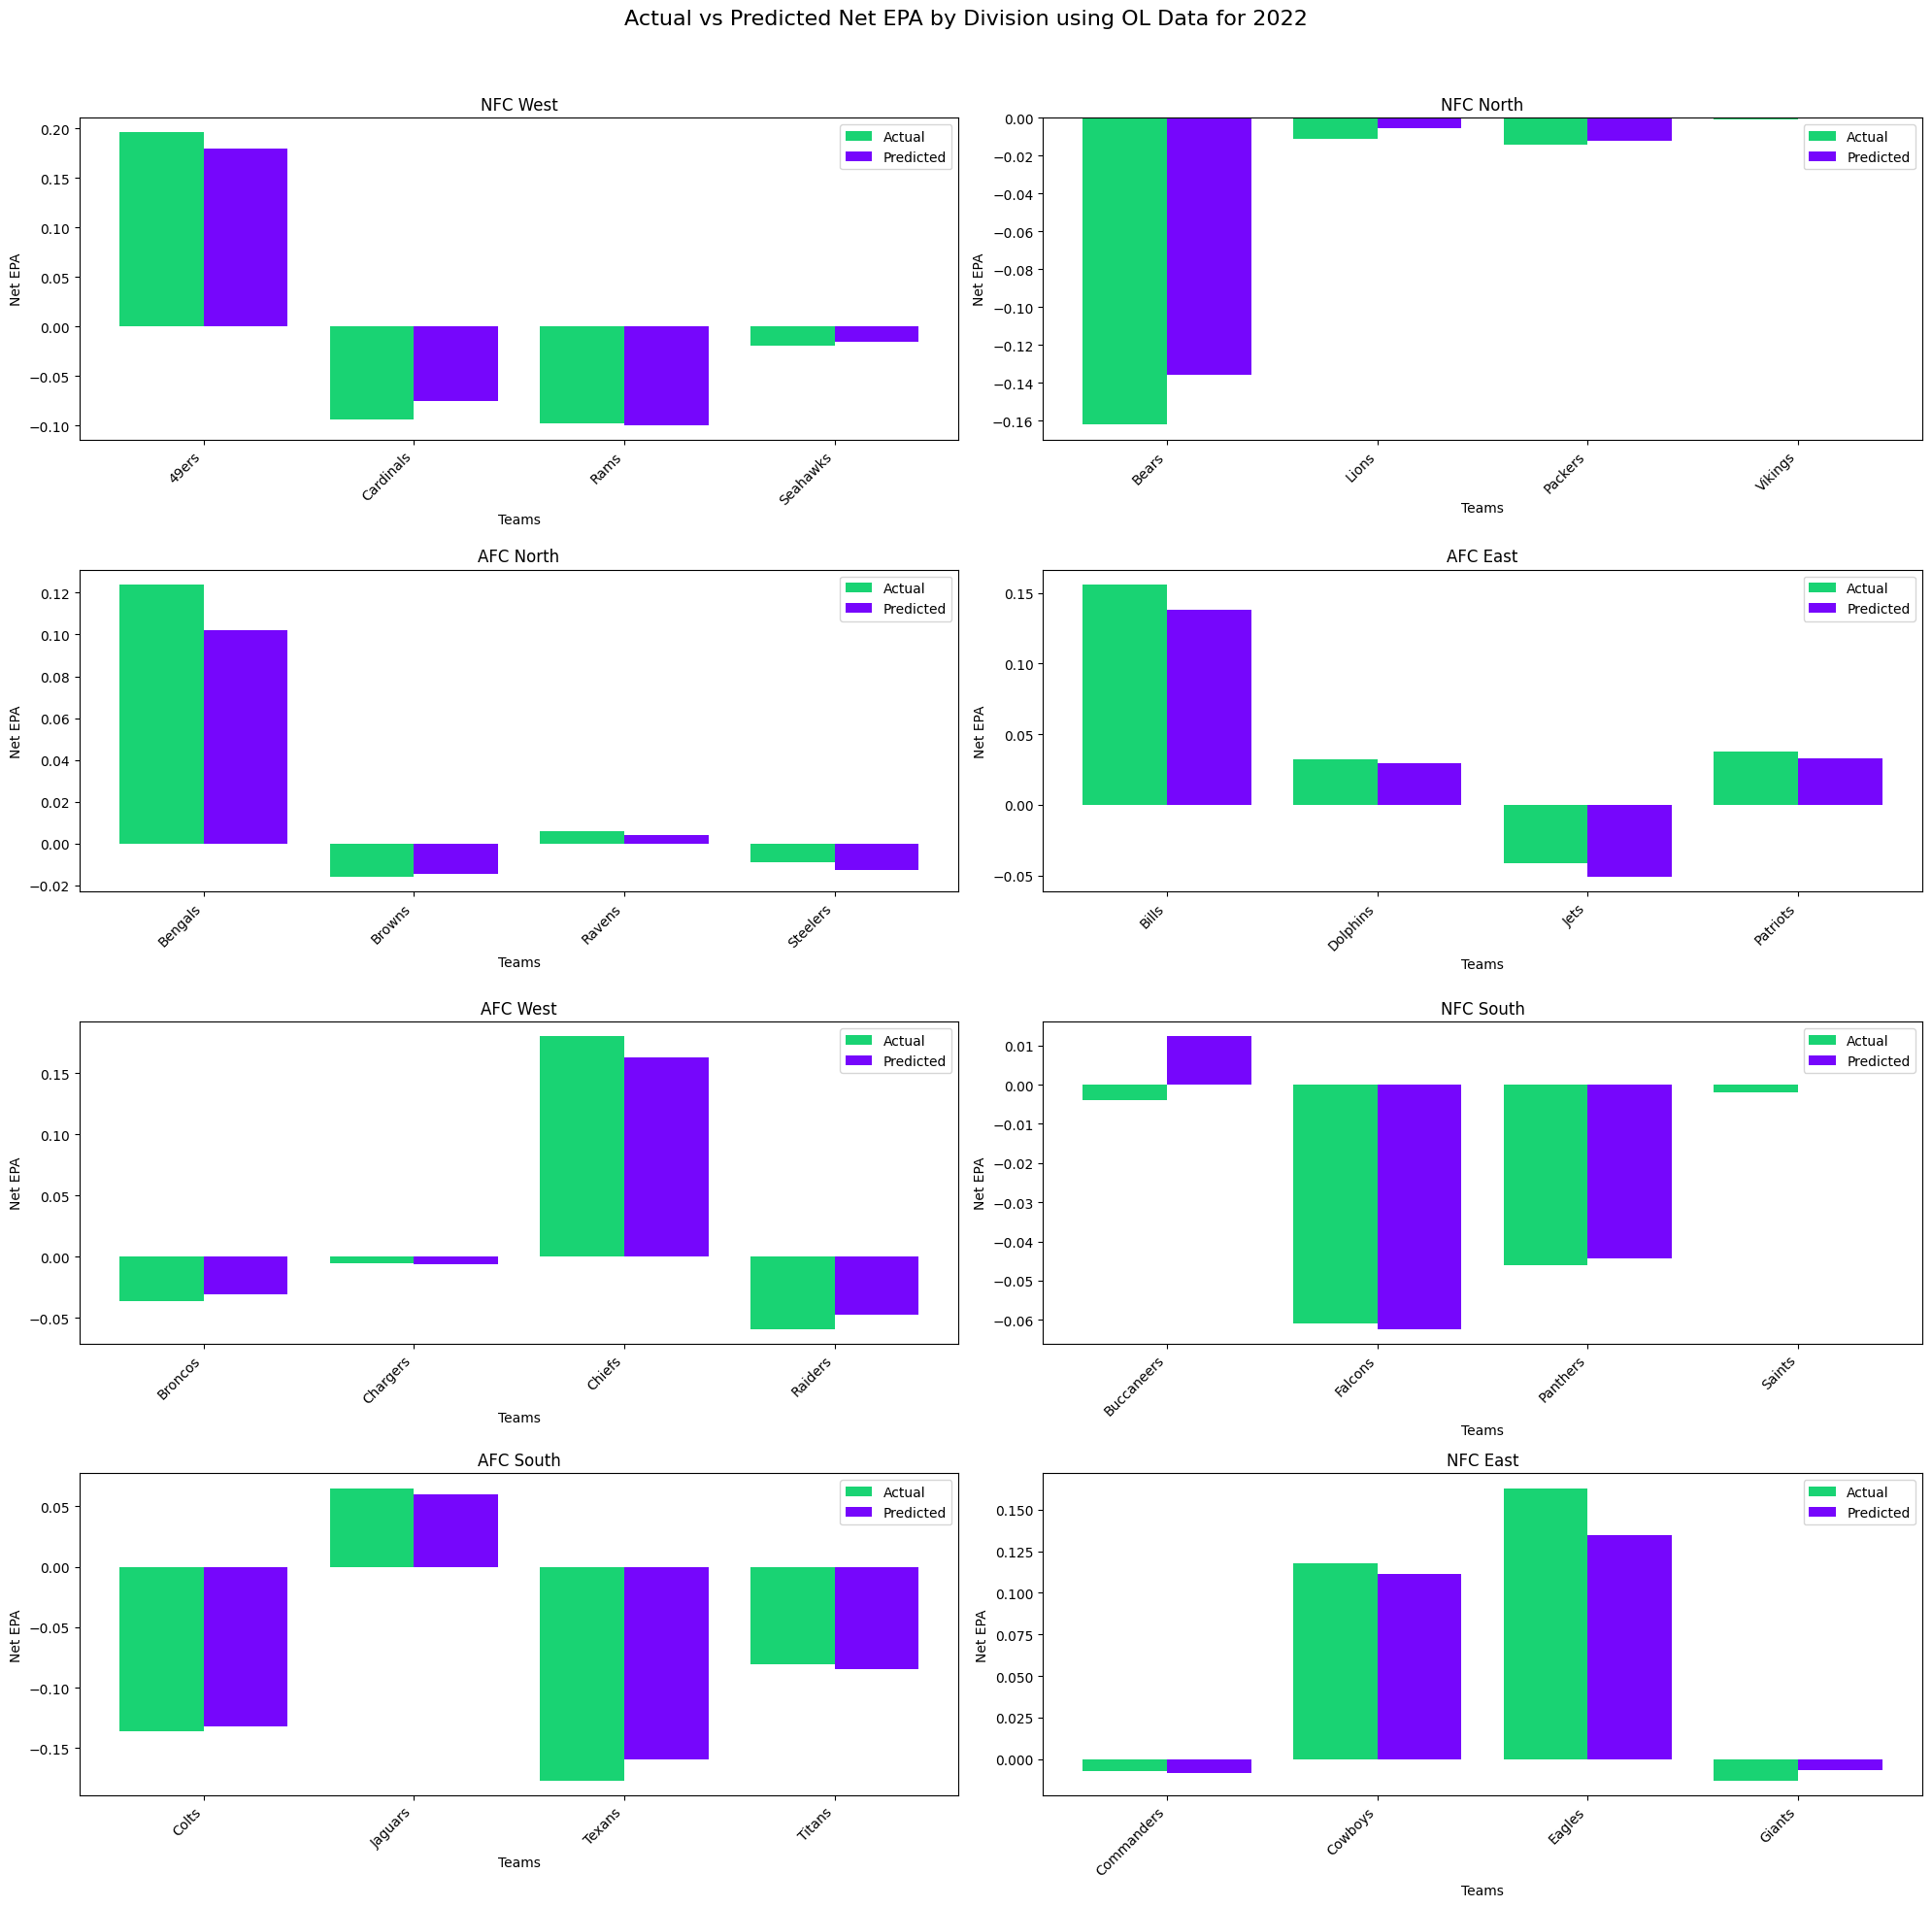

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 918us/step - loss: 2.7032e-04
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 4.2909e-04
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 7.3655e-04
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 839us/step - loss: 4.5682e-04
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - loss: 5.3840e-04
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - loss: 4.3792e-04
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 684us/step - loss: 4.2064e-04
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - loss: 5.4057e-04
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 3.0187e-04
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 703us/step - loss: 4.7214e-04
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - loss: 7.4691e-04
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - loss: 3.9767e-04
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 620us/step - loss: 3.0597e-04
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 689us/step - loss: 6.7258e-04
Epoch 15/200
4/

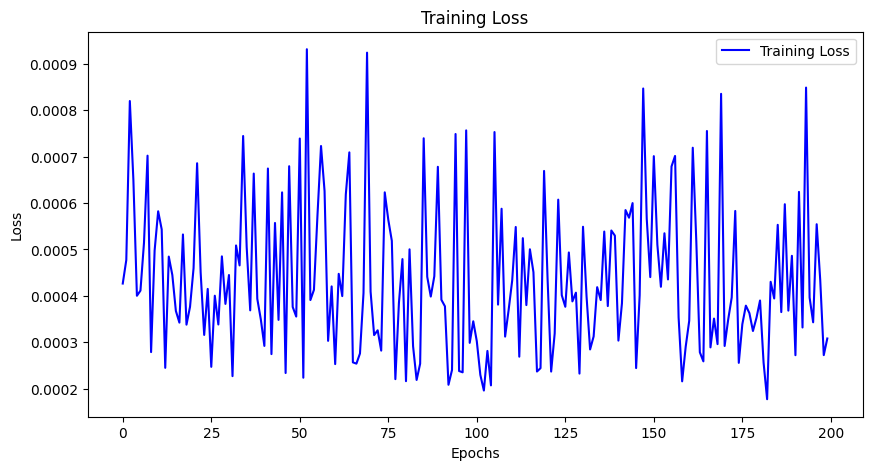

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: 0.9943


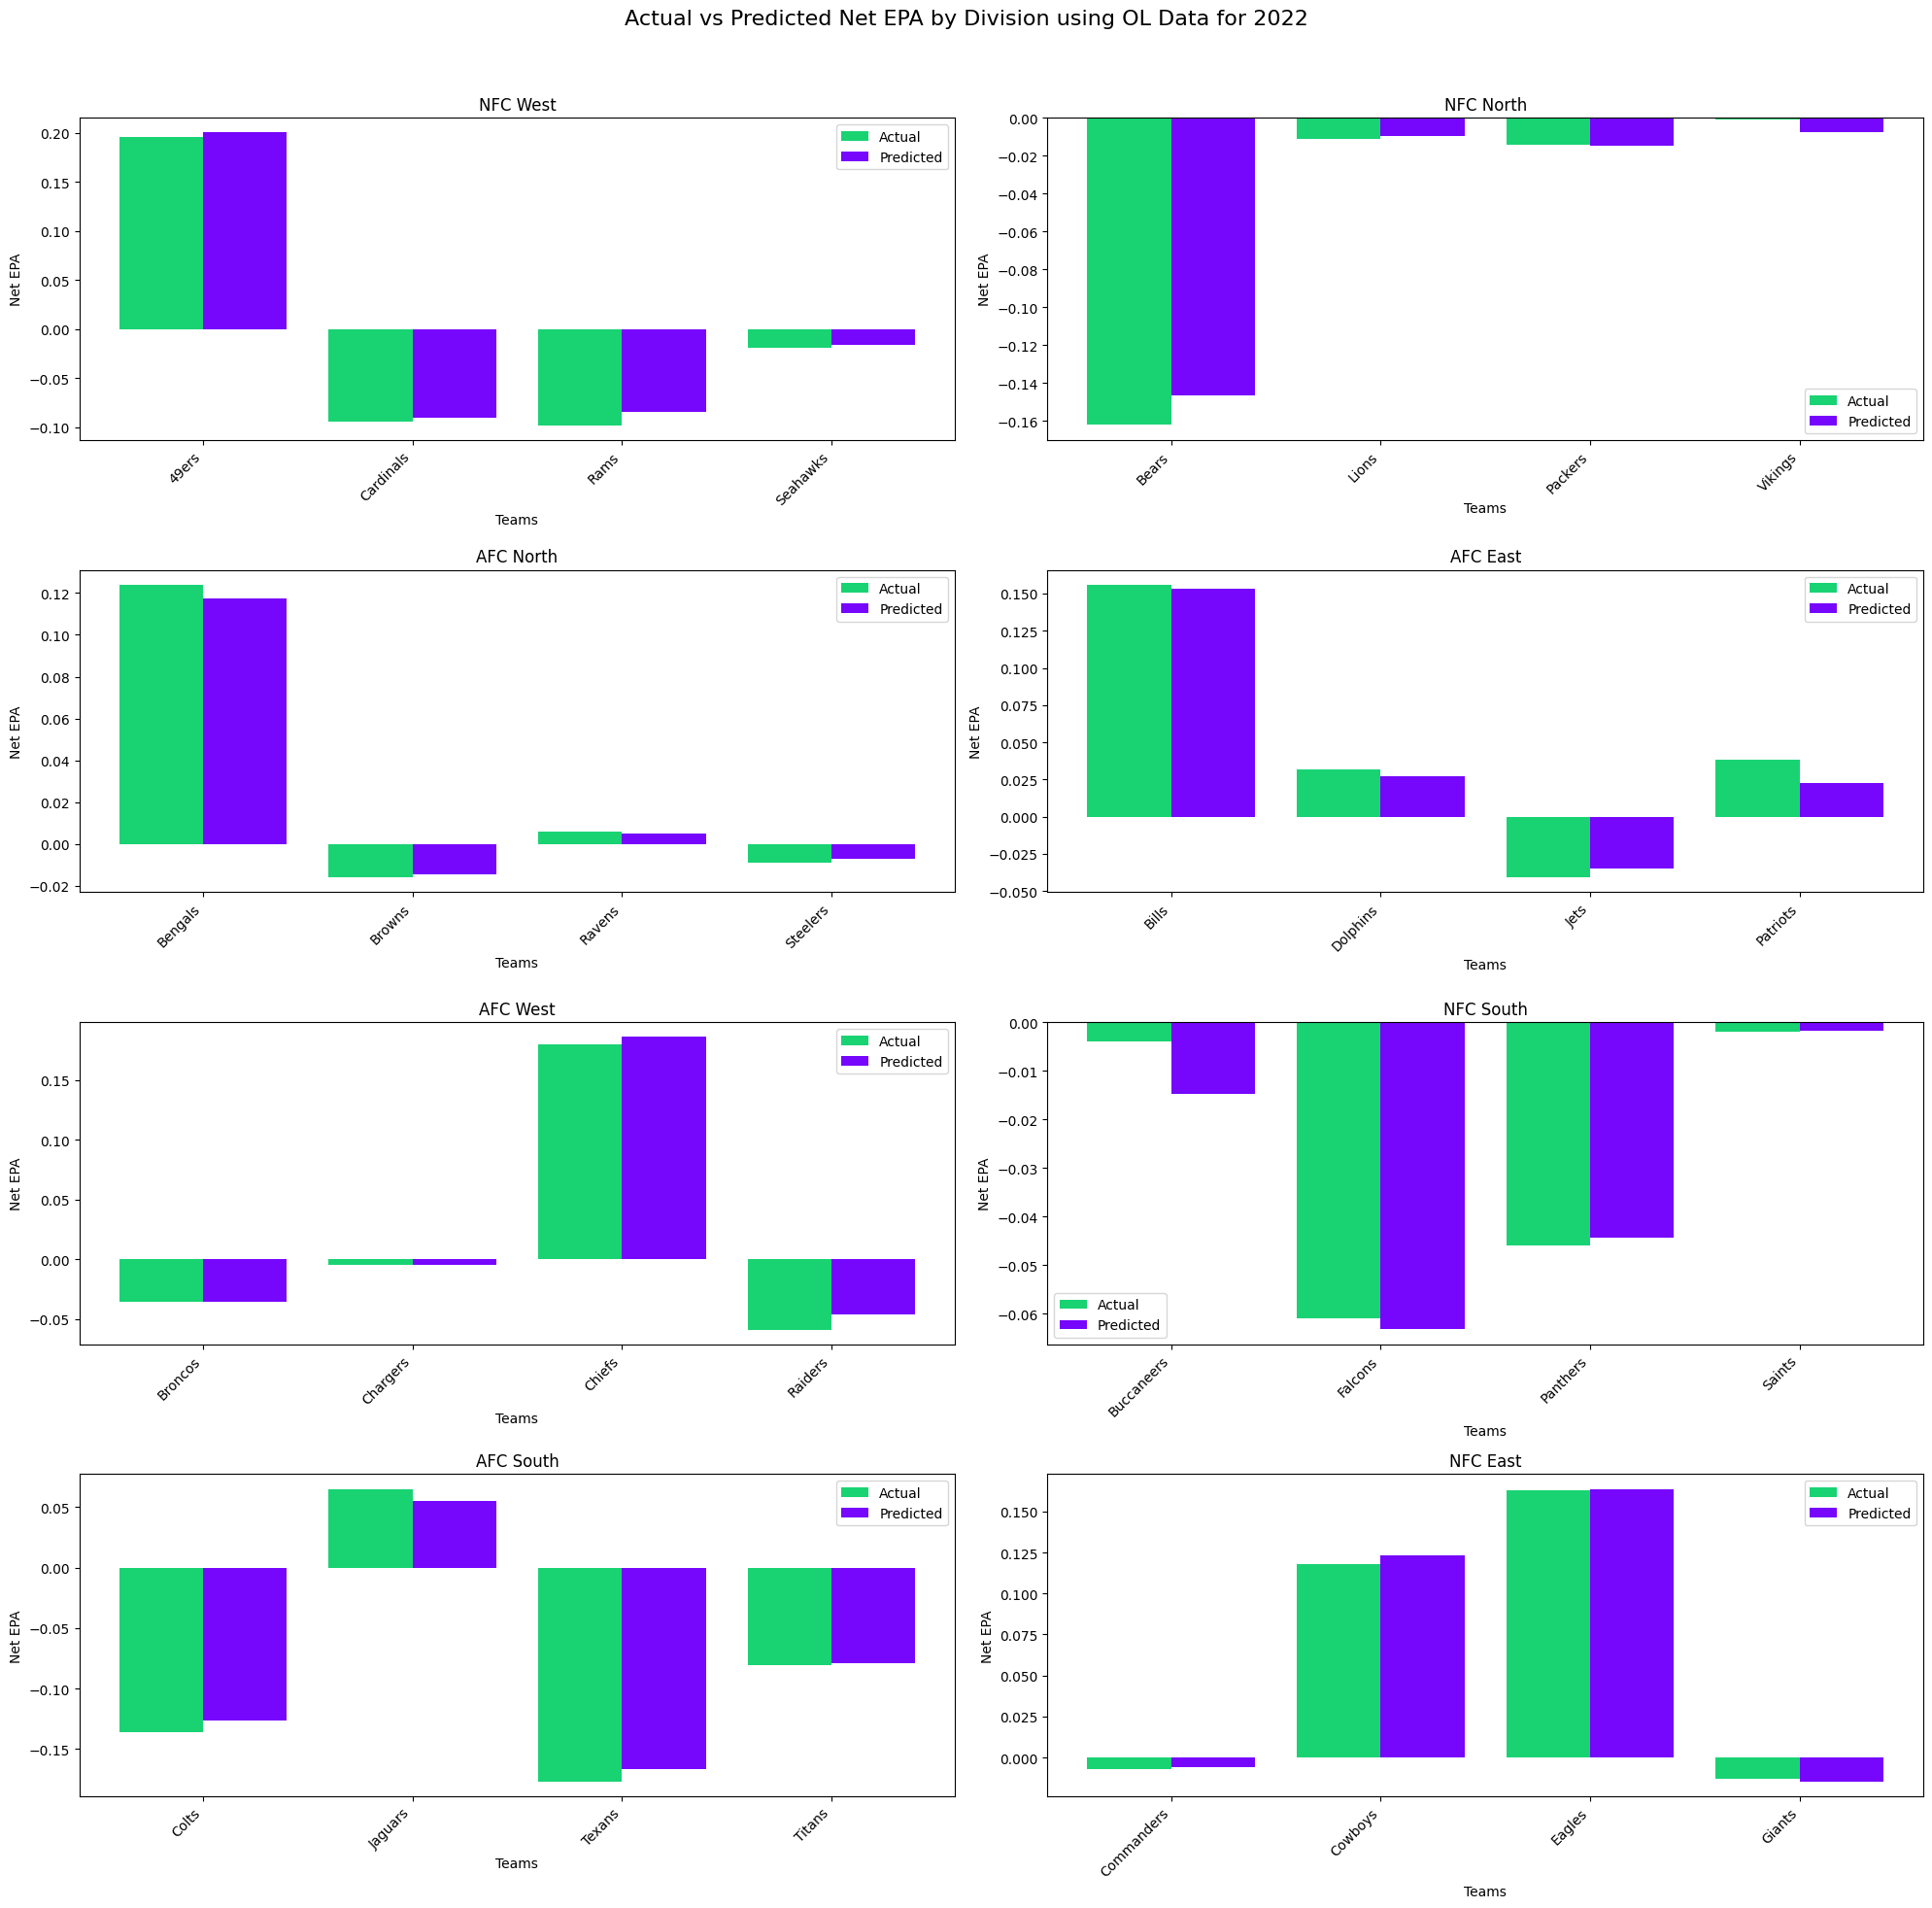

Epoch 1/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.7082e-04
Epoch 2/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 745us/step - loss: 3.2236e-04
Epoch 3/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 4.3379e-04
Epoch 4/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 8.2465e-04
Epoch 5/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 814us/step - loss: 3.1343e-04
Epoch 6/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step - loss: 3.9574e-04
Epoch 7/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 759us/step - loss: 5.5884e-04
Epoch 8/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 906us/step - loss: 2.2805e-04
Epoch 9/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - loss: 5.0709e-04
Epoch 10/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 4.8574e-04
Epoch 11/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 777us/step - loss: 2.5988e-04
Epoch 12/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 7.7839e-04
Epoch 13/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step - loss: 2.4090e-04
Epoch 14/250
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 734us/step - loss: 7.9700e-04
Epoch 15/250
4/4 

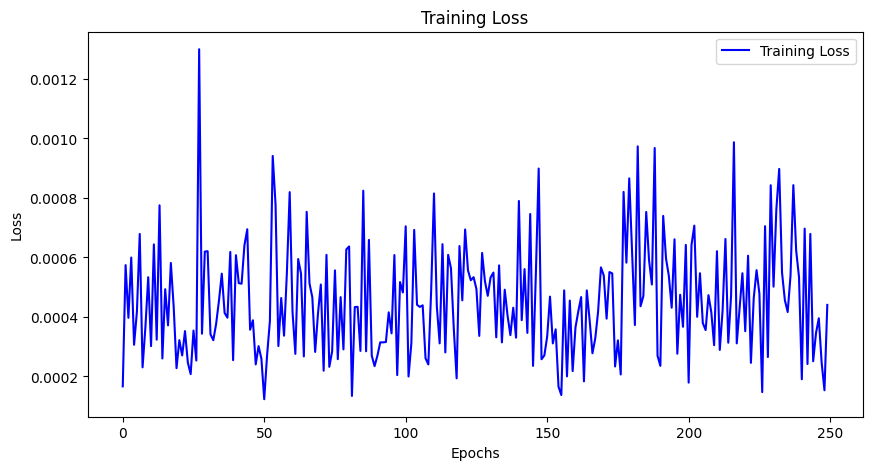

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
R² Score: 0.9958


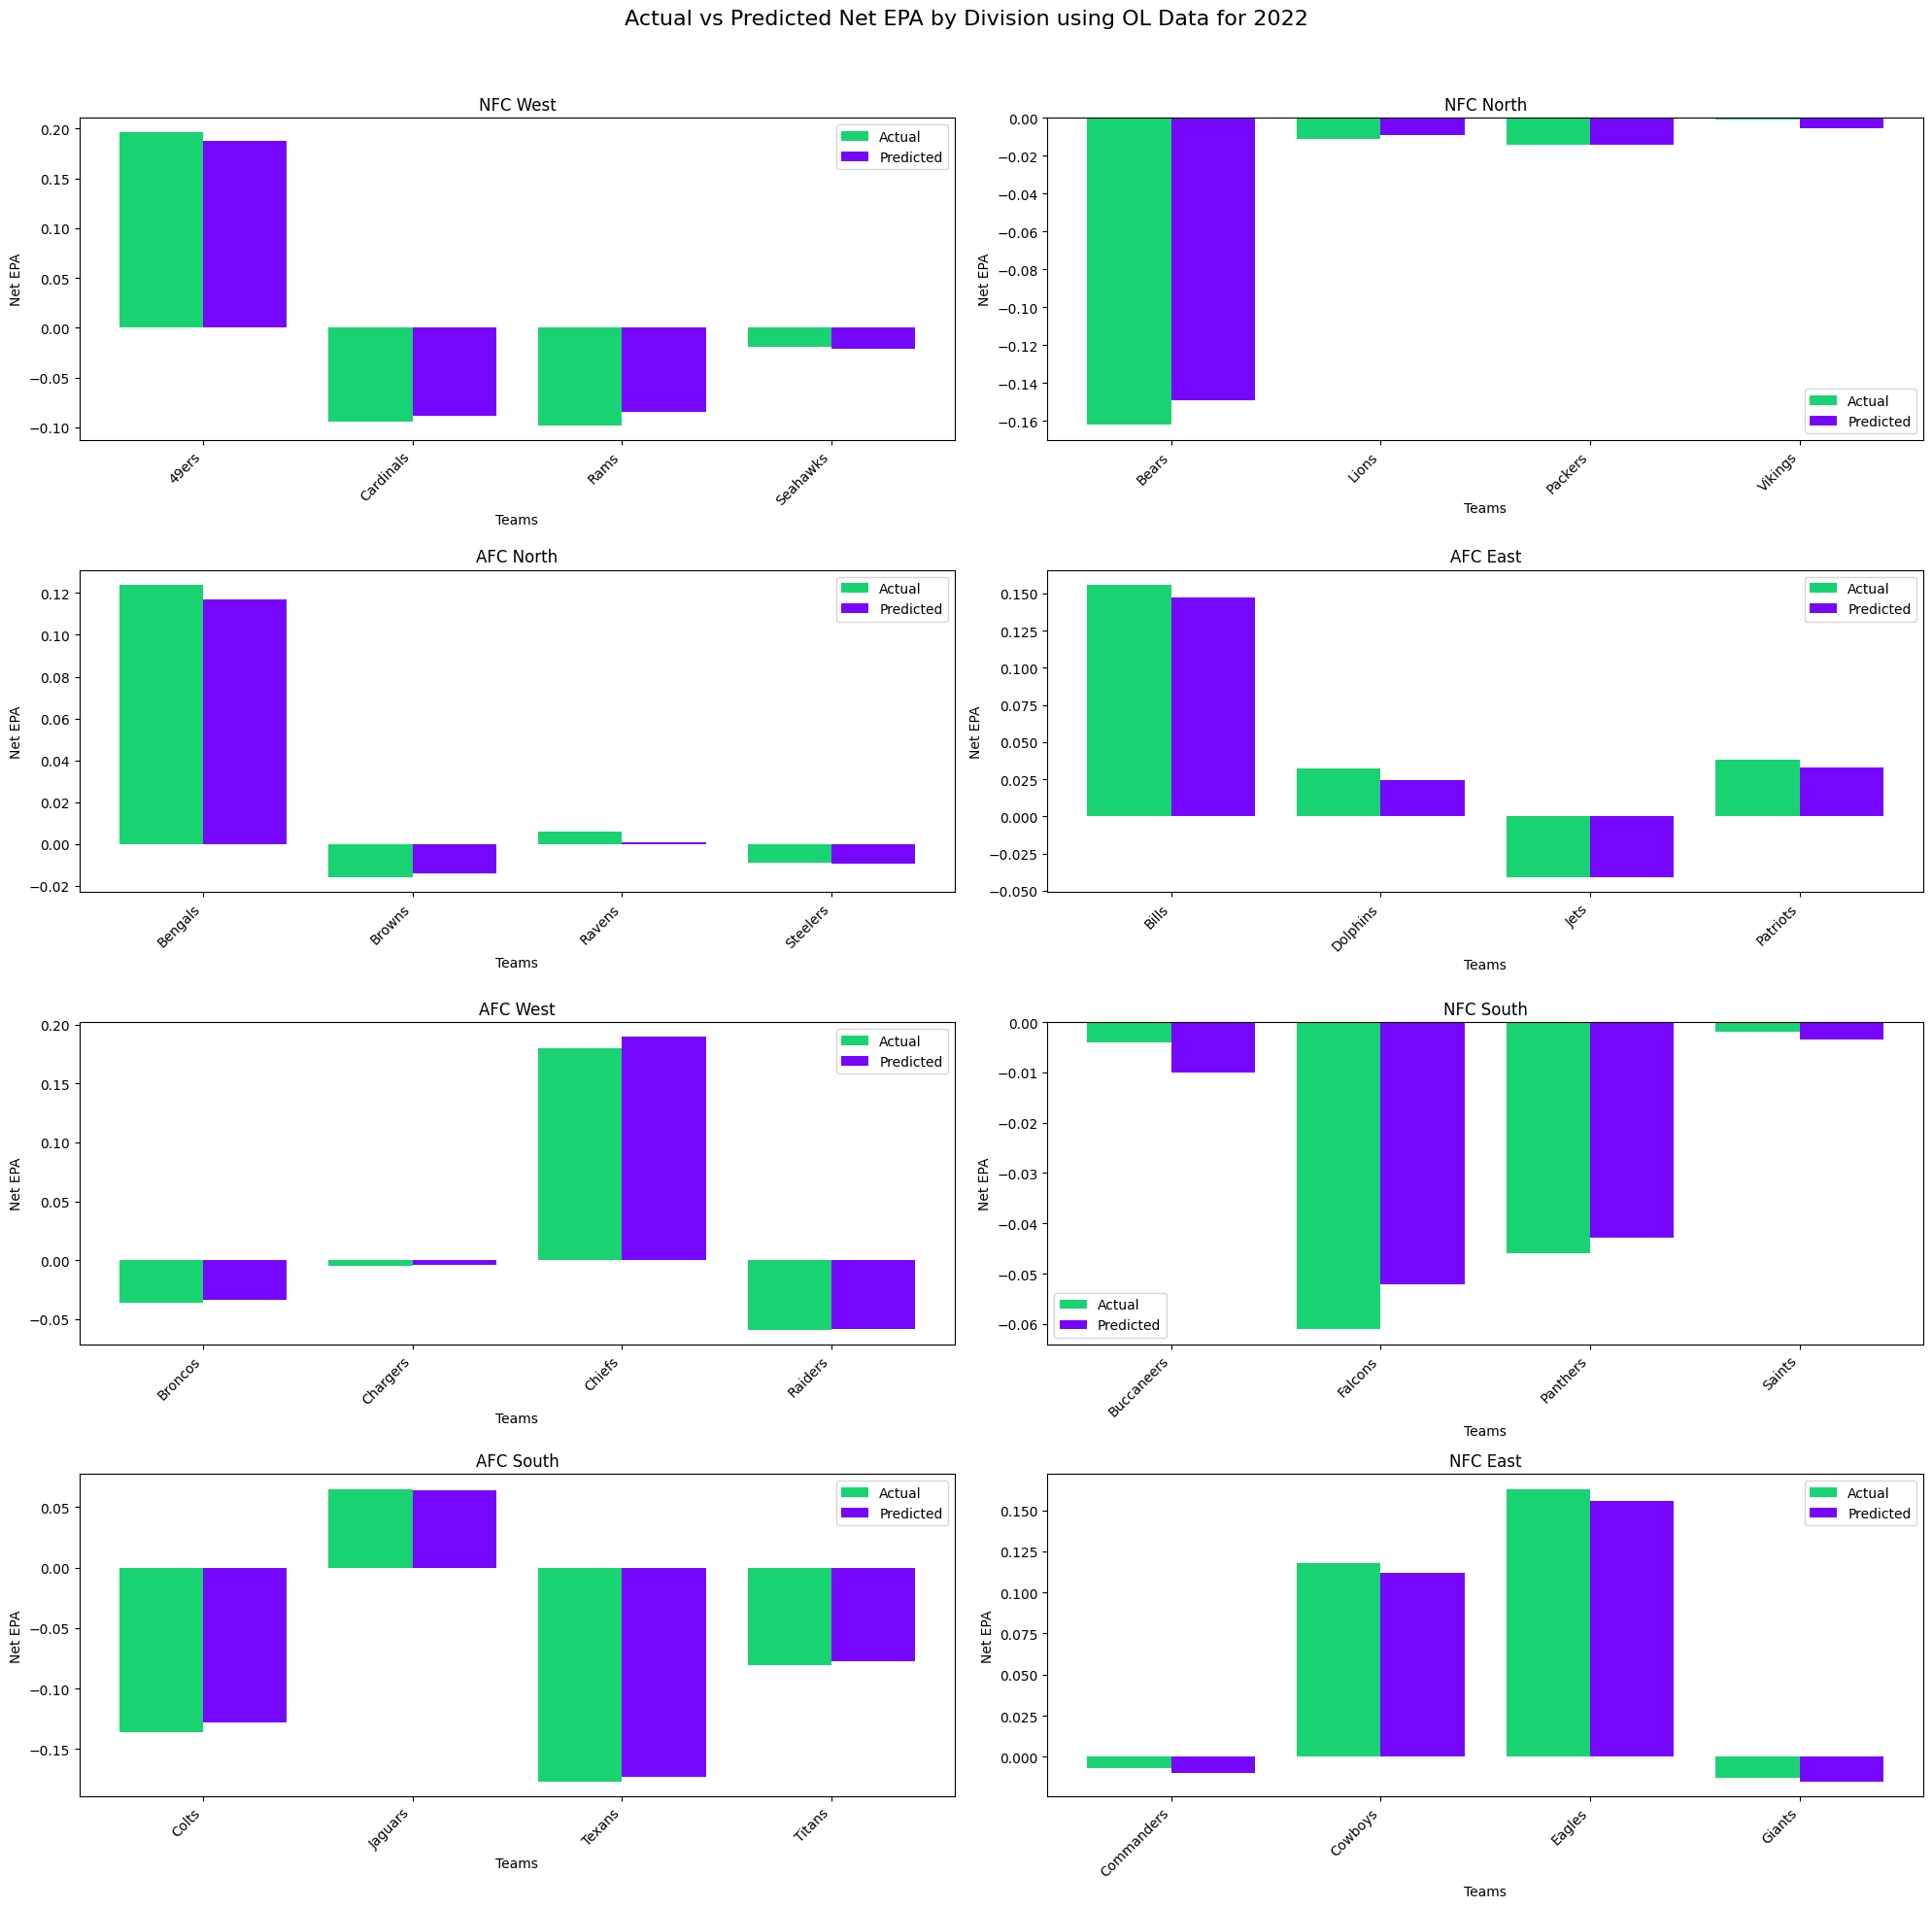

In [37]:
#Training the Model using RNN
epoch_list = [100,150,200,250]
for e in epoch_list:
    history = model.fit(S, t, epochs=e, batch_size = 9)
    # Plot training & validation loss
    plt.figure(figsize=(10, 5))
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    plt.title('Training Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    #Making predictions on the test set
    t_pred = model.predict(S)
    from sklearn.metrics import r2_score
    
    #Calculating R² score
    r2 = r2_score(t, t_pred)
    
    
    # Print R² score
    print(f"R² Score: {r2:.4f}")
    data = ol_df[ol_df['Year'] == 2022].copy()
    data['Predicted_Net_EPA'] = t_pred
    data['Model Actual Net EPA'] = t
    divisions = {
    "49ers": "NFC West", "Bears": "NFC North", "Bengals": "AFC North", "Bills": "AFC East",
    "Broncos": "AFC West", "Browns": "AFC North", "Buccaneers": "NFC South",
    "Cardinals": "NFC West", "Chargers": "AFC West", "Chiefs": "AFC West", "Colts": "AFC South",
    "Commanders": "NFC East", "Cowboys": "NFC East", "Dolphins": "AFC East", "Eagles": "NFC East",
    "Falcons": "NFC South", "Giants": "NFC East", "Jaguars": "AFC South", "Jets": "AFC East",
    "Lions": "NFC North", "Packers": "NFC North", "Panthers": "NFC South", "Patriots": "AFC East",
    "Raiders": "AFC West", "Rams": "NFC West", "Ravens": "AFC North", "Saints": "NFC South",
    "Seahawks": "NFC West", "Steelers": "AFC North", "Texans": "AFC South", "Titans": "AFC South",
    "Vikings": "NFC North"
}

    # Add the "Division" column
    data["Division"] = data["Team"].map(divisions)
    columns_to_keep = ['Net EPA', 'Predicted_Net_EPA', 'Team', 'Model Actual Net EPA', 'Division']
    data = data.loc[:, columns_to_keep]
    
    divisions = data["Division"].unique()
    fig, axes = plt.subplots(4, 2, figsize=(20, 20))  # 4 rows, 2 columns

    for ax, division in zip(axes.flatten(), divisions):
        fig.suptitle('Actual vs Predicted Net EPA by Division using OL Data for 2022', fontsize=16)
        division_data = data[data["Division"] == division]
        x = np.arange(4)  # Generate x-axis positions
        width = 0.4  # Bar width
        # Plot actual and predicted for this division
        ax.bar(x - width / 2, division_data['Net EPA'], width, label='Actual', color='#19D373')  # Hex for Actual
        ax.bar(x + width / 2, division_data['Predicted_Net_EPA'], width, label='Predicted', color='#7606FC')  # Hex for Predicted
        
        ax.set_xticks(x)
        ax.set_xticklabels(division_data['Team'], rotation=45, ha='right')
        ax.set_title(division)
        ax.set_xlabel('Teams')
        ax.set_ylabel('Net EPA')
        ax.legend()

    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
    plt.show()
 